In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

![image.png](attachment:image.png)

# Gaussian Distribution

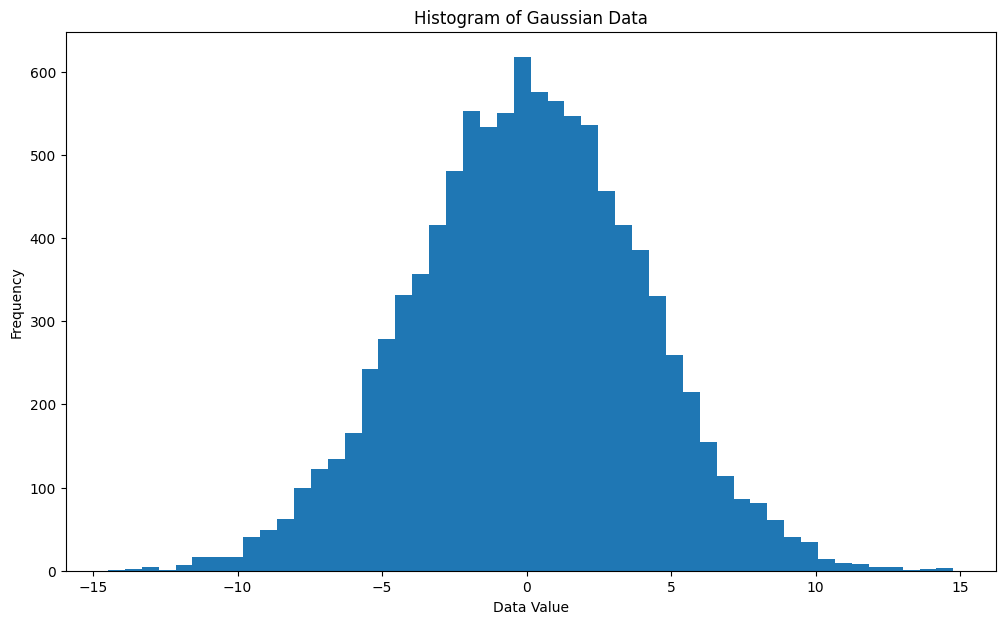

In [14]:
np.random.seed(10)
# We choose mean ans standard deviation for our normal distribution
mu = 0
sigma = 4
# Make a random sample of 10.000 data points for normal distribution
X = np.random.standard_normal(size=10000) * sigma + mu
# making our histogram
plt.hist(X, bins=50)
plt.title("Histogram of Gaussian Data")
plt.xlabel("Data Value")
plt.ylabel("Frequency")

plt.rcParams["figure.figsize"] = [8, 6]
plt.show()

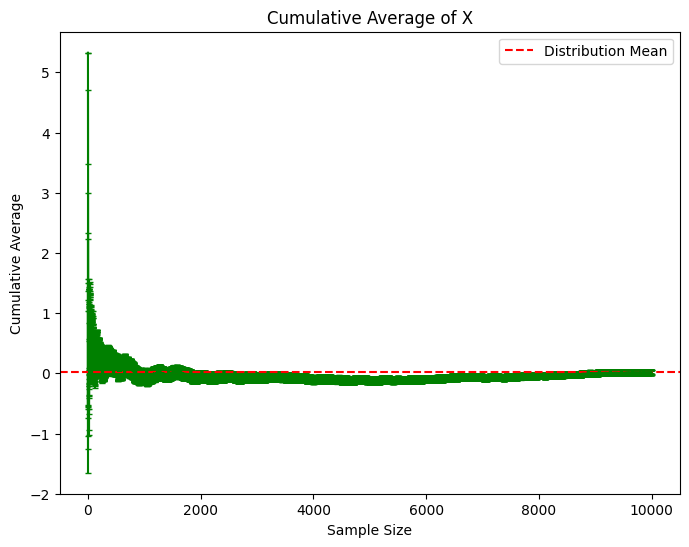

In [15]:
#Point 3 til 6
cumulative_avg = np.cumsum(X) / np.arange(1, len(X) + 1)
cumulative_error = np.cumsum((X - cumulative_avg) ** 2) / np.arange(1, len(X) + 1)
cumulative_standard_error = np.sqrt(cumulative_error) / np.sqrt(np.arange(1, len(X) + 1))

distribution_mean = np.mean(X) #  (1/N) sum(x_i) 
distribution_median = np.median(X) # (1/N) sum(x_i)

plt.errorbar(np.arange(1, len(X) + 1), cumulative_avg, yerr=cumulative_standard_error, fmt='-', capsize=2,color='green')
plt.axhline(y=distribution_mean, color='red', linestyle='--', label='Distribution Mean')

plt.xlabel('Sample Size')
plt.ylabel('Cumulative Average')
plt.title('Cumulative Average of X')
plt.legend()
plt.rcParams["figure.figsize"] = [12, 7]
plt.show()


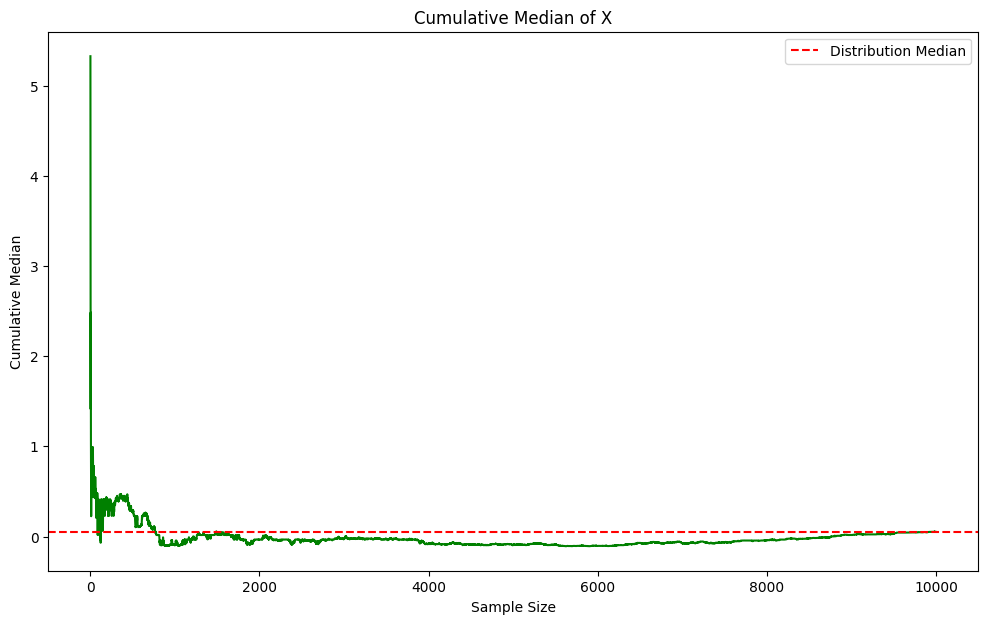

In [16]:
#Point 7 til 8
cumulative_median = np.zeros(len(X))
for i in range(len(X)):
    cumulative_median[i] = np.median(X[:i+1])

plt.plot(np.arange(1, len(X) + 1), cumulative_median, '-',color="green")
plt.axhline(y=distribution_median, color='r', linestyle='--', label='Distribution Median')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Median')
plt.title('Cumulative Median of X')
plt.legend()
plt.show()

# Pareto Distribution

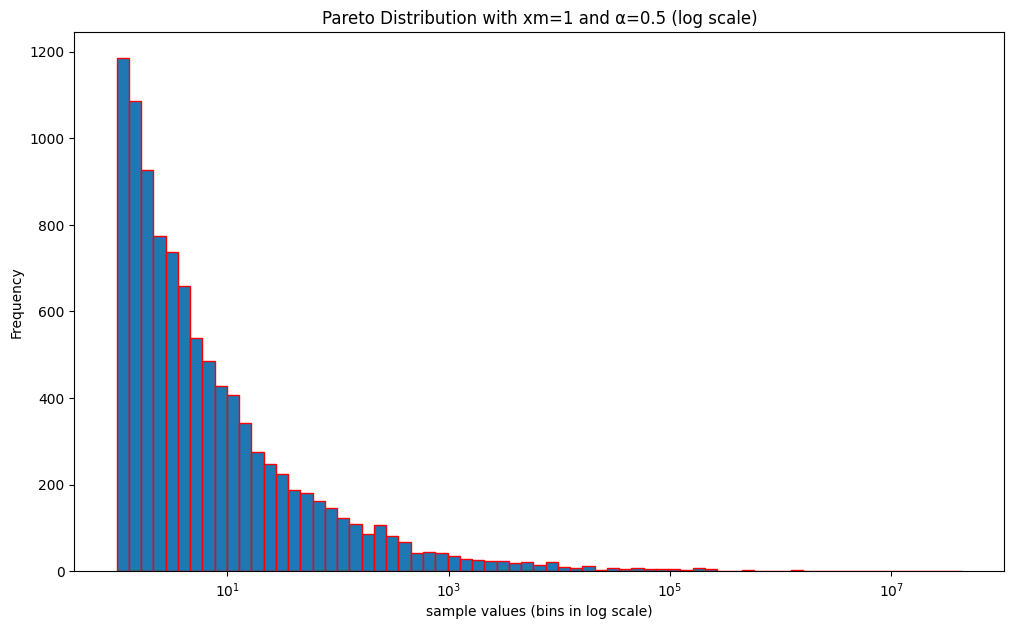

In [17]:
#Point 9 until 10
np.random.seed(9)
#Pareto distribution
xm = 1 #mode
alpha = 0.5 #shape
bin_num = 70

Pareto_data = (np.random.pareto(alpha, size=10000) + 1) * xm
#Pareto_data = np.random.pareto(alpha, size=10000) + xm - 1 both methods seem to work
#plt.hist(Pareto_data, bins=300, log=True) # , log=True)

plt.hist(Pareto_data, bins = np.logspace(np.log10(1),np.log10(np.max(Pareto_data)),bin_num),ec="red")
#plt.yscale('log')
plt.xscale('log')

plt.title("Pareto Distribution with xm=1 and α=0.5 (log scale)")
plt.xlabel("sample values (bins in log scale)")
plt.ylabel("Frequency")
#plt.ylabel("Frequency (log scale)")
plt.show()


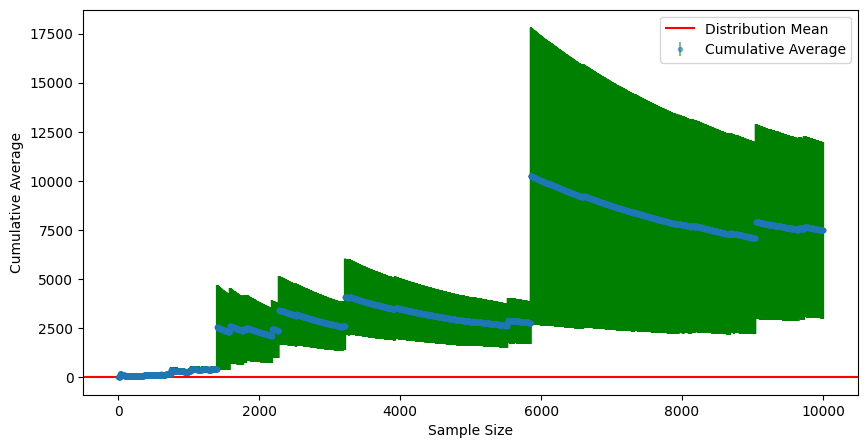

In [18]:
cumulative_avg_Par = np.cumsum(Pareto_data) / np.arange(1, len(Pareto_data) + 1)
cumulative_error_Par = np.cumsum((Pareto_data - cumulative_avg_Par) ** 2) / np.arange(1, len(Pareto_data) + 1)
cumulative_standard_error_Par = np.sqrt(cumulative_error_Par) / np.sqrt(np.arange(1, len(Pareto_data) + 1)) # (approximated) standard error.

distribution_mean_Par = alpha*xm/(alpha-1) #np.mean(Pareto_data) Theoretical or observed estimators?
distribution_median_Par = xm * (2**(1/alpha)) #np.median(Pareto_data)
sample_mean_par = np.mean(Pareto_data)

plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(1, len(Pareto_data)+1), cumulative_avg_Par, yerr=cumulative_standard_error_Par, fmt='.', ecolor='green', alpha=0.5, label='Cumulative Average')
plt.axhline(distribution_mean_Par, color='r', label='Distribution Mean')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Average')
plt.legend()
plt.show()
#Graph makes sense, when taking the distribution into account. There are times when we sample a lucky observation (at around 1700, 2200, 3200 and 5800).

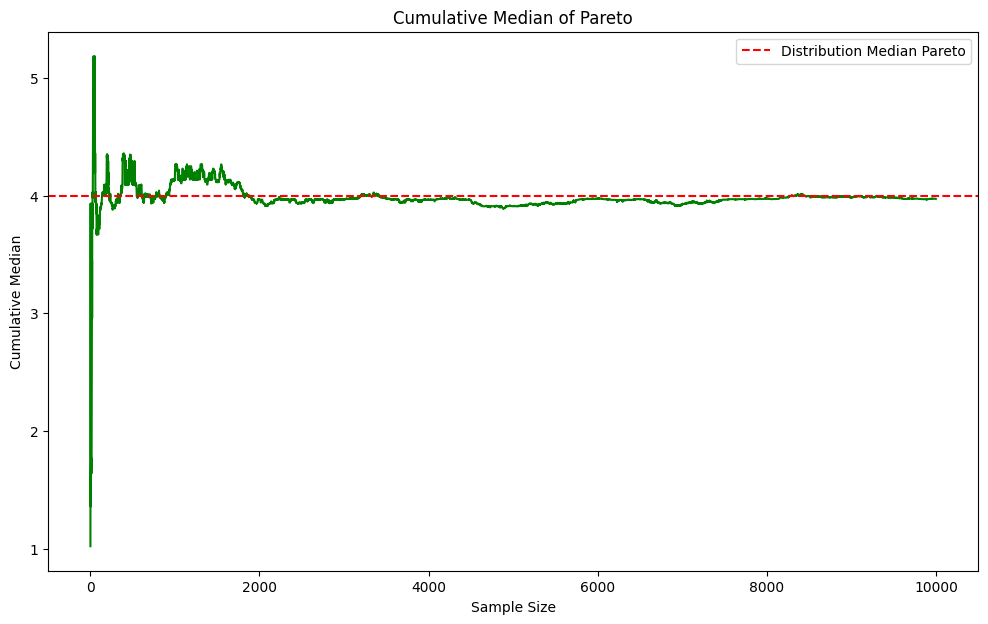

In [20]:
#Point 7 till 8
cumulative_median_pareto = np.zeros(len(Pareto_data))
for i in range(len(Pareto_data)):
    cumulative_median_pareto[i] = np.median(Pareto_data[:i+1])

plt.plot(np.arange(1, len(Pareto_data) + 1), cumulative_median_pareto, '-',color="green")
plt.axhline(y=distribution_median_Par, color='r', linestyle='--', label='Distribution Median Pareto')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Median')
plt.title('Cumulative Median of Pareto')
plt.legend()
plt.show() # The median is very low compared to mean, since ~99% we sample low numbers 
           #  and while the mean might be pushed up by a single lucky number, when we are calculating median, we only look at quantiles.

# LogNormal Distribution

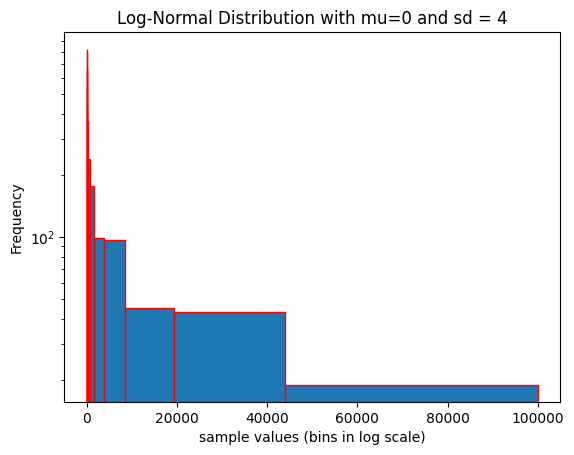

In [7]:
np.random.seed(8)
# We choose mean ans standard deviation for our normal distribution
mu = 0
sigma = 4
bin_num = 15
# Make a random sample of 10.000 data points for normal distribution
X_log = np.exp(np.random.standard_normal(size=10000) * sigma + mu) # np.random.lognormal(sigma=4,size=10000) #
# making our histogram
plt.hist(X_log, bins = np.logspace(np.log10(1),np.log10(np.max(100000)),bin_num),ec="red")
#plt.hist(X_log, bins = 100,log = True)
plt.yscale('log')
plt.title("Log-Normal Distribution with mu=0 and sd = 4")
plt.xlabel("sample values (bins in log scale)")
plt.ylabel("Frequency")
#plt.ylabel("Frequency (log scale)")
plt.show()


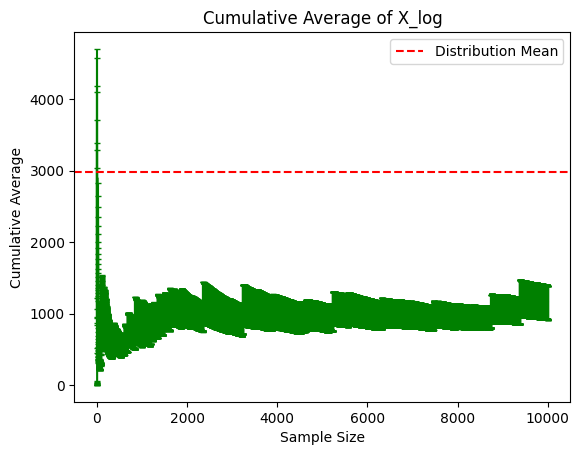

In [8]:
#Point 3 till 6
cumulative_avg_log = np.cumsum(X_log) / np.arange(1, len(X_log) + 1)
cumulative_error_log = np.cumsum((X_log - cumulative_avg_log) ** 2) / np.arange(1, len(X_log) + 1)
cumulative_standard_error_log = np.sqrt(cumulative_error_log) / np.sqrt(np.arange(1, len(X_log) + 1))

distribution_mean_log = np.exp((4**2)/2) #np.exp(np.mean(X_log) + (np.std(X_log)**2)/2) #np.mean(X_log) #  (1/N) sum(x_i) 
distribution_median_log = np.exp(0) #np.exp(np.mean(X_log))#np.median(X_log) # (1/N) sum(x_i)

plt.errorbar(np.arange(1, len(X_log) + 1), cumulative_avg_log, yerr=cumulative_standard_error_log, fmt='-', capsize=2,color='green')
plt.axhline(y=distribution_mean_log, color='red', linestyle='--', label='Distribution Mean')

plt.xlabel('Sample Size')
plt.ylabel('Cumulative Average')
plt.title('Cumulative Average of X_log')
plt.legend()
plt.rcParams["figure.figsize"] = [12, 7]
plt.show() #Der ser ik så godt ud...

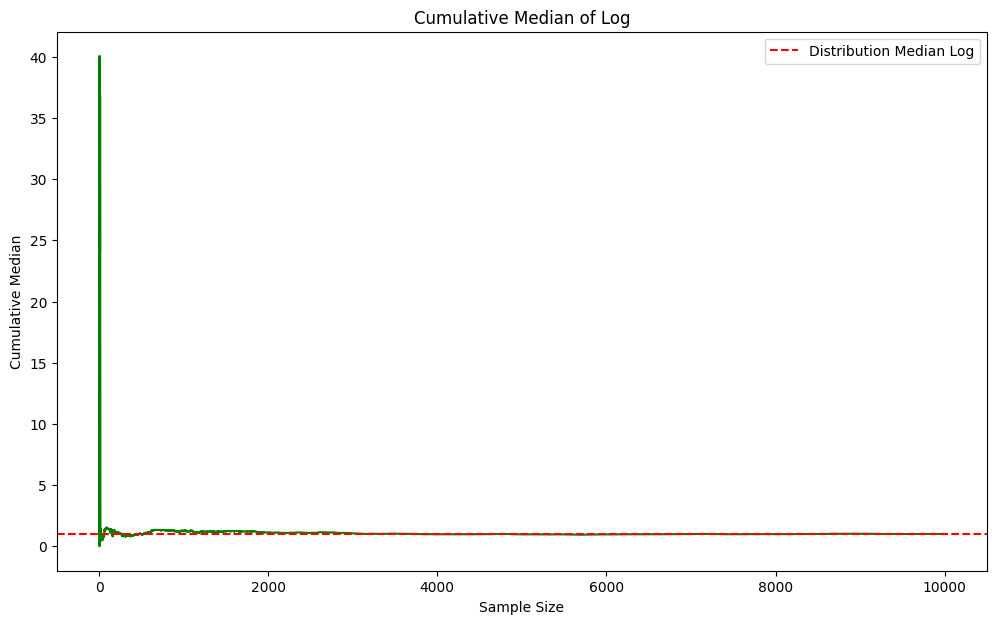

In [9]:
#Point 7 till 8
cumulative_median_log = np.zeros(len(X_log))
for i in range(len(X_log)):
    cumulative_median_log[i] = np.median(X_log[:i+1])

plt.plot(np.arange(1, len(X_log) + 1), cumulative_median_log, '-',color="green")
plt.axhline(y=distribution_median_log, color='r', linestyle='--', label='Distribution Median Log')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Median')
plt.title('Cumulative Median of Log')
plt.legend()
plt.show() # The median is very low compared to mean, since ~99% we sample low numbers 
           #  and while the mean might be pushed up by a single lucky number, when we are calculating median, we only look at quantiles.

# Paper Dataset

In [119]:
paper_cite = pd.read_csv('path...')

x_data = np.random.choice(paper_cite, size = 10000)

inf

# Svar på spørgsmål

## Spørgsmål 1

Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?

* The Gaussian distribution's cumulative average increases slowly and monotonically, without experiencing any sudden changes.
* As the higher values in the tail are added, the Pareto and LogNormal distributions cumulative averages first rise quickly but later start to climb more slowly.
* The cumulative average slows down more noticeably as compared to the LogNormal distribution because the Pareto distribution has a significantly bigger tail.

- We would expect does results since it represents the properties of their distributions. Gaussian distribution has a round curve and is symmetric around the mean which makes the avrerage increase slowly and monotonically. Pareto distribution is heavily skewed towards the start which makes the average increase rapidly at first and then slows down. LogNormal distribution is close to Pareto distribution but is less skewed, resulting in a less pronounced slowing down of the cumulative average.

## Spørgsmål 2

Compare the cumulative median vs the cumulative average for the three previous distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more useful in the different cases?



- Both the cumulative average and median graphs look the same and move smoothly and monotonically without any changes, they are close to the same graph. 
- Both the cumulative average and median graphs for Pareto and LogNormal look completely different, which shows that their can be a totally different interpretation of the data. 

- The conclusions we can draw are that for the Gaussian distribution, the mean and median are very close to each other so they would both be useful for statistics. As for the other two distributions, since they have long tails and extreme values, the median would be more useful since it isn't as sensitive to extreme values.